# Datos de Admisiones

## Librerías a utilizar

In [2]:
import pandas as pd
import numpy as np
import pyodbc
from matplotlib import pyplot as plt
%matplotlib inline 

## a. Cree una conexión a SQL Server a la base de datos de AdmisionesDWH

In [3]:
conexion = pyodbc.connect('Driver={SQL Server};'
                          'Server=LAPTOP-MHM32UUF;'
                          'Database=Admisiones_DWH;'
                          'Trusted_Connection=yes;')

## b. Utilice las librerías para manipulación de datos vistas en clase y cree data frames para las siguientes operaciones

### i. Un conteo de la cantidad de exámenes que se realizaron agrupado por facultad

In [4]:
data = pd.read_sql('select * from fact.examen e '
	+ ' inner join dimension.carrera car on e.sk_carrera=car.sk_carrera' 
	+ ' inner join dimension.Candidato can on e.SK_Candidato = can.SK_Candidato' 
	+ ' inner join dimension.Fecha f on e.DateKey = f.DateKey',conexion)

In [5]:
df_ExamenesXFacultad = data.groupby('NombreFacultad').count()['ID_Examen'].reset_index(name='ConteoExamenes')
df_ExamenesXFacultad

,NombreFacultad,ConteoExamenes
0,Arquitectura,4132
1,Ciencias Agricolas,1471
2,Ciencias Economicas,4189
3,Ciencias Politicas,4258
4,Ingeniería,4274
5,Medicina,4130


### ii. Un conteo de la cantidad de candidatos agrupados por genero

In [6]:

df_candidatosXGenero = data.groupby('Genero').count()['ID_Examen'].reset_index(name='Candidatos')
df_candidatosXGenero

,Genero,Candidatos
0,F,11101
1,M,11353


### iii. Un total de la cantidad de ingresos por evaluaciones (columna precio) que se ha recibido agrupado por carrera

In [7]:
df_ingresosPorCarrera = data.groupby('NombreCarrera').sum()['Precio'].reset_index(name='Monto total')
df_ingresosPorCarrera

,NombreCarrera,Monto total
0,Admin de Empresas,681005.95
1,Agronomia,697360.50
2,Arquitecrtura,647149.31
3,Ciencias sociales,669337.90
4,Contador Publico y Auditor,669215.37
5,Derecho internacional,701028.83
6,Diseño Industrial,640390.65
7,Diseño grafico,672837.46
8,Enfermeria,642697.91
9,Hoteleria,638154.88


### iv. Un data frame filtrado que contenga únicamente las tres facultades con el promedio de la nota mas alto

In [8]:
df_Top3PromediosXCarrera = (data.groupby('NombreCarrera').mean()['NotaTotal'].reset_index(name='Promedio nota')).sort_values(by='Promedio nota', ascending = False).head(3)
df_Top3PromediosXCarrera

,NombreCarrera,Promedio nota
0,Admin de Empresas,75.798600
12,Ingenieria en Informatica y Sistemas,75.775018
15,Terapia respiratoria,75.774931


## c. Utilice las librerías para plot (graficas) y cree las siguientes graficas

### i. Un grafico de pie con la cantidad de exámenes agrupados por facultad

([<matplotlib.patches.Wedge at 0x244ba26d760>,
 [Text(0.9212418162118103, 0.6010936000846835, 'Arquitectura'),
  Text(0.22796011993501153, 1.0761199671594313, 'Ciencias Agricolas'),
  Text(-0.60572610207182, 0.9182025317264593, 'Ciencias Economicas'),
  Text(-1.0793229511967846, -0.21227804177508233, 'Ciencias Politicas'),
  Text(-0.20003285217253994, -1.081659307754396, 'Ingeniería'),
  Text(0.9214099682788977, -0.6008358098151948, 'Medicina')],
 [Text(0.5024955361155329, 0.3278692364098273, '18.4%'),
  Text(0.12434188360091536, 0.5869745275415078, '6.6%'),
  Text(-0.33039605567553815, 0.5008377445780686, '18.7%'),
  Text(-0.5887216097437006, -0.11578802278640853, '19.0%'),
  Text(-0.10910882845774904, -0.5899959860478522, '19.0%'),
  Text(0.5025872554248533, -0.32772862353556076, '18.4%')])

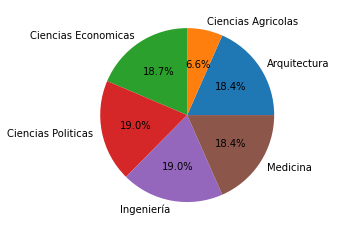

In [9]:

plt.pie(df_ExamenesXFacultad['ConteoExamenes'],labels=df_ExamenesXFacultad.NombreFacultad,autopct='%1.1f%%')

### ii. Un grafico de barras con el promedio de la nota agrupado por carrera

In [63]:
df_PromediosXCarrera = (data.groupby('NombreCarrera').mean()['NotaTotal'].reset_index(name='Promedio nota')).sort_values(by='Promedio nota', ascending = False)
df_PromediosXCarrera


0                        Admin de Empresas
12    Ingenieria en Informatica y Sistemas
15                    Terapia respiratoria
5                    Derecho internacional
10                   Ingenieria Industrial
8                               Enfermeria
13                       Medico y Cirujano
14                    Relaciones politicas
3                        Ciencias sociales
9                                Hoteleria
4               Contador Publico y Auditor
11                      Ingenieria Quimica
6                        Diseño Industrial
7                           Diseño grafico
2                            Arquitecrtura
1                                Agronomia
Name: NombreCarrera, dtype: object

<AxesSubplot:ylabel='NombreCarrera'>

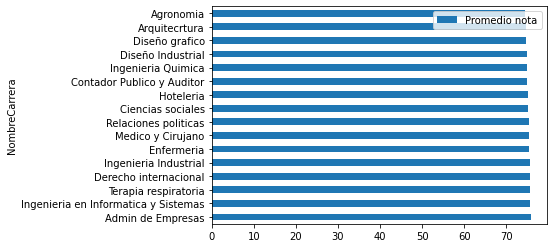

In [86]:
df_PromediosXCarrera.plot.barh(x="NombreCarrera", y="Promedio nota")
# hace falta ajustar el eje para que se vean las diferenciass


### iii. un grafico de línea con la cantidad de exámenes por año


In [90]:
df_examenesXAnio = data.groupby('Year').count()['ID_Examen'].reset_index(name='Examenes')
df_examenesXAnio

,Year,Examenes
0,2016,4310
1,2017,4416
2,2018,4538
3,2019,4540
4,2020,4650


<AxesSubplot:xlabel='Year'>

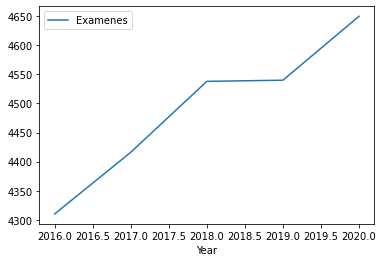

In [91]:
df_examenesXAnio.plot.line(x="Year", y="Examenes")